In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import sweetviz as sv
import dtale

import config

# 最大表示列数の指定（ここでは50列を指定）
pd.set_option("display.max_columns", 50)

In [2]:
df_cna = pd.read_table(config.RAW_BRCA_METABRIC_DIR + "/data_cna.txt", index_col=0).T
df_cna = df_cna.drop(df_cna.index[0])
df_cna.head()

Hugo_Symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AACSP1,AADAC,AADACL2,AADACL3,AADACL4,AADAT,AAED1,AAGAB,AAK1,AAMDC,AAMP,AANAT,AAR2,...,ZSCAN4,ZSCAN5A,ZSCAN5B,ZSCAN9,ZSWIM1,ZSWIM2,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZSWIM7,ZSWIM8,ZSWIM8-AS1,ZUFSP,ZW10,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
MB-0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MB-0039,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0
MB-0045,-1.0,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,2.0,0.0,0.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,-1.0,-1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0,-2.0,0.0
MB-0046,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,-1.0,0.0
MB-0048,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,0.0,0.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,-1.0,0.0


# 特徴量が重複していないか確認
遺伝子名が数多く存在するので、特徴量の名前に重複がないか確認する。

In [3]:
import collections

[k for k, v in collections.Counter(df_cna.columns.tolist()).items() if v > 1]

['PALM2AKAP2']

In [55]:
df_cna.shape

(2173, 22544)

In [73]:
# total null num
df_cna.isnull().sum().sort_values(ascending=False).head(467)

Hugo_Symbol
LCE3C       41
GSTT1       35
GSTM1       31
HLA-DRB5    29
TAS2R43     29
            ..
PRR20C       1
POU5F1B      1
NEUROG2      1
PLIN1        0
PMVK         0
Length: 467, dtype: int64

In [74]:
df_cna.isnull().any().sum()

465

In [53]:
# Finding missing data and the percentage of it in each column
total = df_cna.isnull().sum().sort_values(ascending=False)
percent = (df_cna.isnull().sum() / df_cna.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=["Total_NaN", "Percent_Nan"])
missing_data.head()

,Total_NaN,Percent_Nan
Hugo_Symbol,,
LCE3C,41,0.018868
GSTT1,35,0.016107
GSTM1,31,0.014266
HLA-DRB5,29,0.013346
TAS2R43,29,0.013346


findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


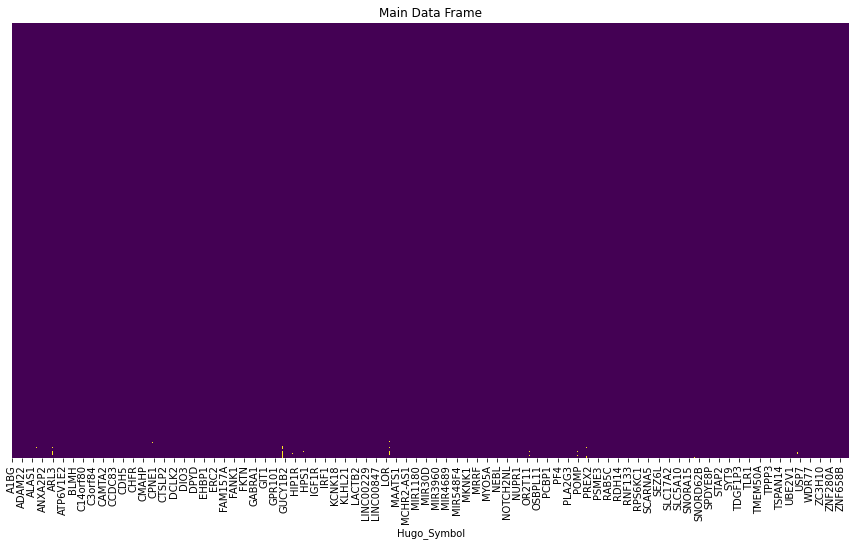

In [54]:
# Visualization of missing data
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df_cna.isnull(), yticklabels=False, cbar=False, cmap="viridis")
ax.set_title("Main Data Frame")
plt.show();

遺伝子データの欠損値は最大でも1.8%（2173個中、41個）と非常に少ない  
nullを少なくとも1つ含むデータは465個

## 